# Clustering de palabras

Se obtienen diferentes clases de equivalencia experimentando con diferentes *features*.

In [1]:
%matplotlib inline

from collections import Counter
import spacy
import pickle
from utils import read_file, experiment

In [2]:
#parametrización
TEXT_FILE = 'lavoztextodump.txt'	# Text to be processed
ENCODING = 'utf8'
CLUSTERS_NUMBER = 20 # Number of clusters of words
MIN_FREQUENCY = 80	# Min word frequency to be considered
MIN_WORDS_COUNT_IN_SENT=10
WINDOWS_SIZE=2
POS_TAG= ['NOUN', 'PROPN', 'PROPN']

In [3]:
nlp = spacy.load('es_core_news_sm', disable=['parser', 'ner'])
nlp.max_length = 34886712

dataset = read_file(TEXT_FILE, ENCODING)
#doc = nlp(dataset)

filename = "trained/doc_npl_la_voz.pickle"
#fileObj = open(filename, 'wb')
#pickle.dump(doc, fileObj)
#fileObj.close()

with open(filename, 'rb') as f:
    doc = pickle.load(f)

## Pre procesamiento

Se realizan los siguientes procesamientos:
1. Eliminación de *stop words*
2. Lematización utilizando Spacy
3. Eliminación de las palabras menos frecuentes
4. Conversión de los lemas a minúscula
5. Eliminación de palabras no alfanuméricas
6. Solo se consideran palabras cuyo *part-of-speech* son un nombre propio, un sustantivo o un pronombre. [Ver *Universal POS tags*](https://universaldependencies.org/docs/u/pos/)

In [4]:
#identificación de las frecuencias de las palabras
sents = [sent for sent in doc.sents if len(sent) > MIN_WORDS_COUNT_IN_SENT] #Se eliminan oraciones con menos de 10 palabras

words = []
words_lemma = []
for sent in sents:
    for word in sent:
        if word.is_alpha and not word.is_stop and word.pos_ in POS_TAG and not word.is_punct and not word.is_space:
            words.append(word)
            words_lemma.append(word.lemma_.strip().lower())

counts = Counter(words_lemma)

#print('total')
#print(len(words))

#common_words = counts.most_common(5)
#print (common_words)
#unique_words = [word for (word, freq) in counts.items() if freq >= MIN_FREQUENCY]
#print (len(unique_words))
#print (unique_words[:3])

## Experimentos

Se realizan diferentes *clustering*, experimentando con diferentes dimensiones.

En general, para cada experimento el procedimiento que se sigue es el siguiente:
1. Se obtienen las *features* que se quieren evaluar
2. Se vectorizan las palabras con *Scikit-learn*
3. Se normaliza la matriz obtenida en el paso anterior a través del número de ocurrencias totales de la columna sobre ocurrencias por cada fila
4. Se reduce la dimensionalidad quitando las columnas con poca varianza, ya que estas no aportan mucha información
5. Se genera el *clustering* utilizando un algoritmo de *k-means* a través de la librería *Scikit-learn*.

### Features

#### Part of speech

*Part of speech* es un rol gramatical que explica cómo se usa una palabra en particular en una oración. Por ejemplo si es un sustantivo, un pronombre, un adjetivo, un verbo, un adverbio, una preposición, etc.

En spaCy, las etiquetas *Part of speech* están disponibles como un atributo en el objeto *Token*. Se acceden a dos atributos de la clase *Token*:
- **tag_**: enumera la parte detallada del *part of speech*.
- **pos_**: enumera la parte del grano grueso  del *part of speech*.

Cada uno de estos atributos se consideran que son *features* diferentes.

#### Dependency parsing

*Dependency parsing* hace referencia a la dependencia sintáctica, es decir, la relación entre tokens.

Define la relación de dependencia entre las palabras clave y sus dependientes. El encabezado de una oración no tiene dependencia y se llama raíz de la oración. El verbo suele ser el encabezado de la oración. Todas las demás palabras están vinculadas al encabezado.

En spaCy, el atributo **dep_** devuelve esta relación.

### Experimento usando solo el atributo **pos_**

Clustering finished

Total clusters: 20
Cluster# 0  - Total words: 53
Cluster# 1  - Total words: 4
Cluster# 2  - Total words: 71
Cluster# 3  - Total words: 1
Cluster# 4  - Total words: 5
Cluster# 5  - Total words: 192
Cluster# 6  - Total words: 2
Cluster# 7  - Total words: 6
Cluster# 8  - Total words: 1
Cluster# 9  - Total words: 7
Cluster# 10  - Total words: 24
Cluster# 11  - Total words: 279
Cluster# 12  - Total words: 51
Cluster# 13  - Total words: 1
Cluster# 14  - Total words: 2
Cluster# 15  - Total words: 20
Cluster# 16  - Total words: 106
Cluster# 17  - Total words: 1
Cluster# 18  - Total words: 13
Cluster# 19  - Total words: 1
Top terms and words per cluster:

Cluster 0
Frequent terms: {'POS__NOUN': 267}, {'POS__NOUN': 4127},
Words: sentido, objetivo, matrimonio, ingreso, colegio, reclamo, estudiante, seguridad, conflicto, necesidad, acto, entidad, cantidad, investigación, declaración, inversión, ruta, número, mano, diferencia, producción, iniciativa, informe, pedido, crisis, hi

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


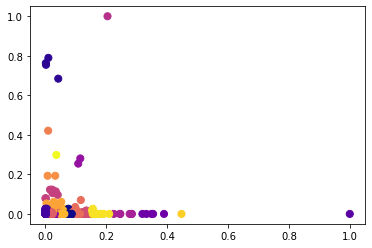

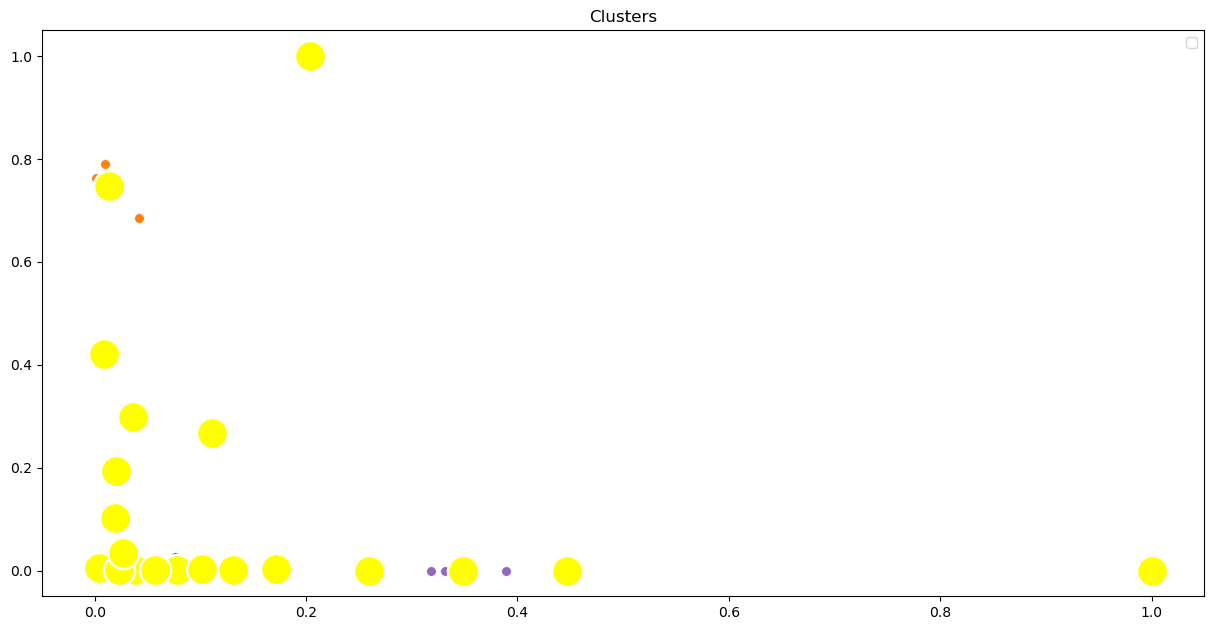

In [5]:
experiment(doc, words, counts, MIN_FREQUENCY, WINDOWS_SIZE, CLUSTERS_NUMBER, True, False, False, False, False)

### Experimento usando solo el atributo **tag_**

En este expermiento usamos el atributo *tag_* del *Part of speech*.

Clustering finished

Total clusters: 20
Cluster# 0  - Total words: 204
Cluster# 1  - Total words: 3
Cluster# 2  - Total words: 62
Cluster# 3  - Total words: 1
Cluster# 4  - Total words: 3
Cluster# 5  - Total words: 6
Cluster# 6  - Total words: 1
Cluster# 7  - Total words: 90
Cluster# 8  - Total words: 1
Cluster# 9  - Total words: 7
Cluster# 10  - Total words: 9
Cluster# 11  - Total words: 1
Cluster# 12  - Total words: 199
Cluster# 13  - Total words: 5
Cluster# 14  - Total words: 69
Cluster# 15  - Total words: 1
Cluster# 16  - Total words: 2
Cluster# 17  - Total words: 15
Cluster# 18  - Total words: 132
Cluster# 19  - Total words: 29
Top terms and words per cluster:

Cluster 0
Frequent terms: {'TAG__NOUN': 267}, {'TAG__NOUN': 4127},
Words: aspecto, triunfo, secundario, instancia, victoria, ojo, radio, entrada, conjunto, adolescente, continuidad, consenso, gracias, compañero, asesor, promoción, estadística, registro, estructura, desafío, tierra, propiedad, ejecución, actualidad, operativ

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


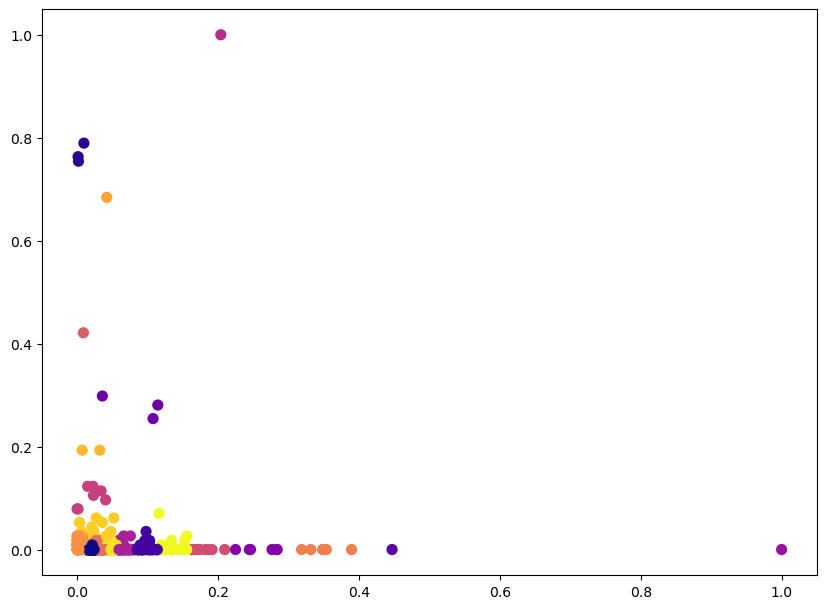

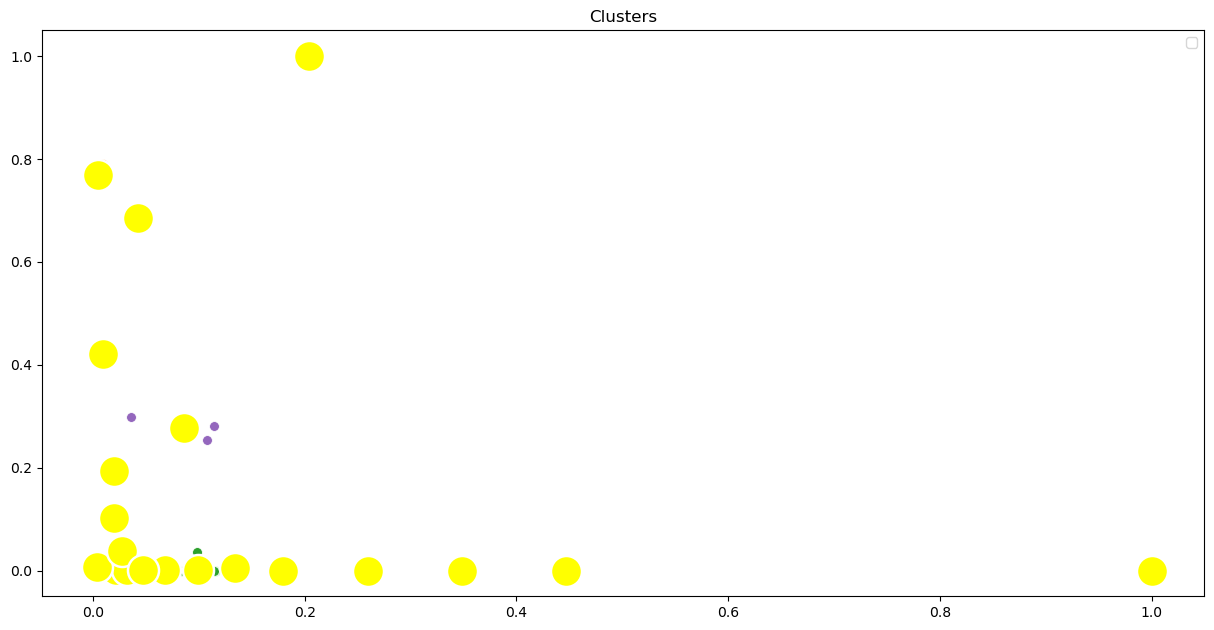

In [7]:
experiment(doc, words, counts, MIN_FREQUENCY, WINDOWS_SIZE, CLUSTERS_NUMBER, False, False, True, False, False)

### Experimento usando solo el atributo **dep_**

Clustering finished

Total clusters: 20
Cluster# 0  - Total words: 191
Cluster# 1  - Total words: 382
Cluster# 2  - Total words: 75
Cluster# 3  - Total words: 11
Cluster# 4  - Total words: 26
Cluster# 5  - Total words: 3
Cluster# 6  - Total words: 38
Cluster# 7  - Total words: 12
Cluster# 8  - Total words: 1
Cluster# 9  - Total words: 5
Cluster# 10  - Total words: 4
Cluster# 11  - Total words: 1
Cluster# 12  - Total words: 4
Cluster# 13  - Total words: 1
Cluster# 14  - Total words: 5
Cluster# 15  - Total words: 1
Cluster# 16  - Total words: 18
Cluster# 17  - Total words: 51
Cluster# 18  - Total words: 8
Cluster# 19  - Total words: 3
Top terms and words per cluster:

Cluster 0
Frequent terms: {'DEP__obj': 59, 'DEP__obl': 236, 'DEP__nsubj': 9, 'DEP__conj': 9, 'DEP__nmod': 39, 'DEP__acl': 1, 'DEP__ROOT': 1, 'DEP__amod': 1, 'DEP__appos': 1}, {'DEP__appos': 2, 'DEP__obl': 13, 'DEP__nsubj': 14, 'DEP__obj': 28, 'DEP__nmod': 14, 'DEP__ccomp': 3, 'DEP__conj': 3, 'DEP__ROOT': 2, 'DEP__advcl': 1}

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.8/site-pack

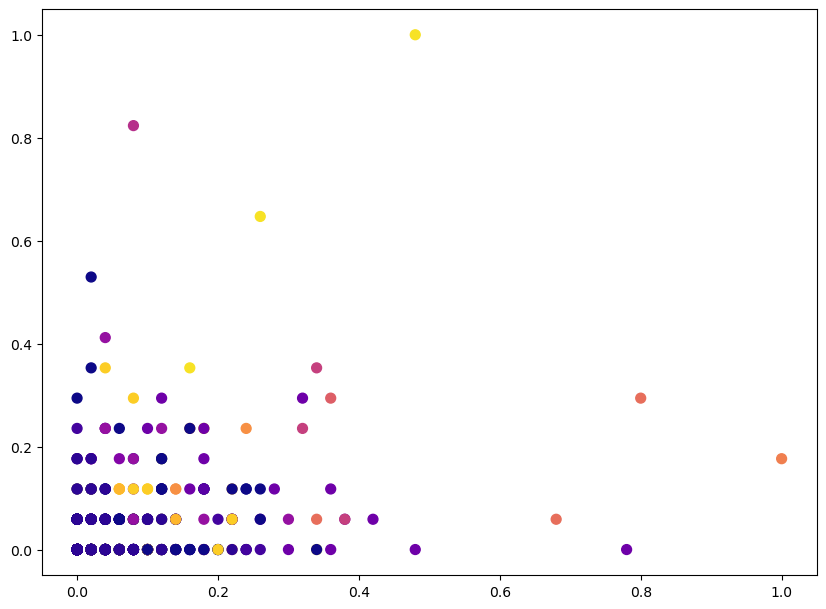

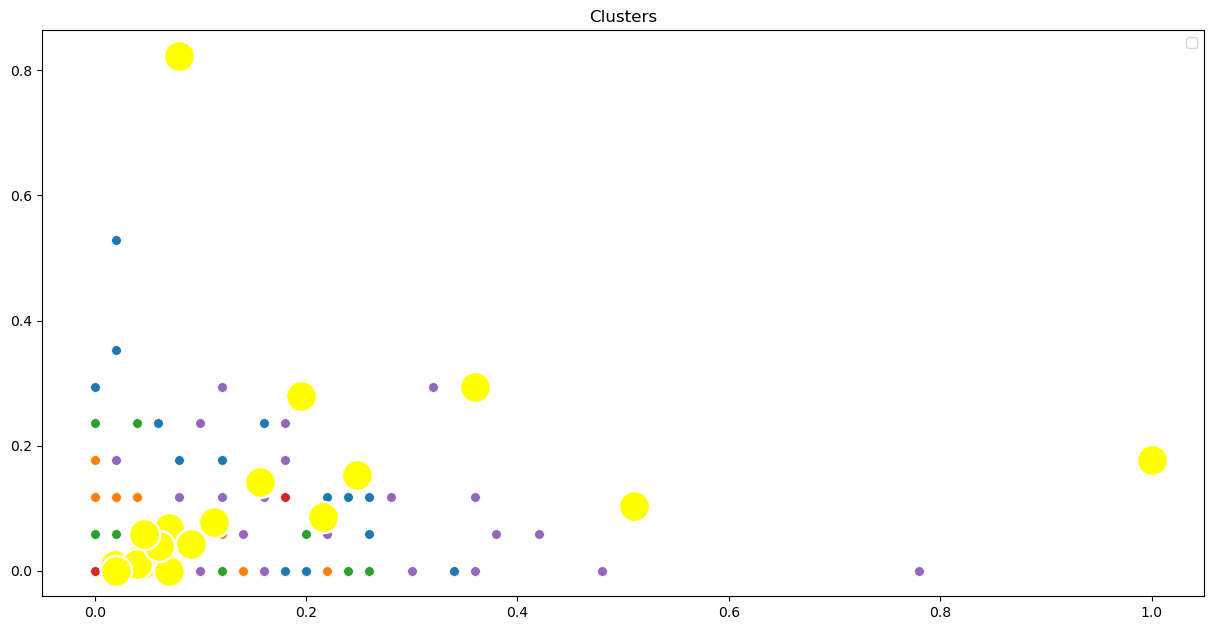

In [8]:
experiment(doc, words, counts, MIN_FREQUENCY, WINDOWS_SIZE, CLUSTERS_NUMBER, False, True, False, False, False)

### Experimento usando solo el atributo **dep_** y **pos_**

Clustering finished

Total clusters: 40
Cluster# 0  - Total words: 29
Cluster# 1  - Total words: 67
Cluster# 2  - Total words: 57
Cluster# 3  - Total words: 1
Cluster# 4  - Total words: 4
Cluster# 5  - Total words: 26
Cluster# 6  - Total words: 11
Cluster# 7  - Total words: 5
Cluster# 8  - Total words: 1
Cluster# 9  - Total words: 1
Cluster# 10  - Total words: 24
Cluster# 11  - Total words: 1
Cluster# 12  - Total words: 219
Cluster# 13  - Total words: 17
Cluster# 14  - Total words: 4
Cluster# 15  - Total words: 1
Cluster# 16  - Total words: 1
Cluster# 17  - Total words: 4
Cluster# 18  - Total words: 1
Cluster# 19  - Total words: 4
Cluster# 20  - Total words: 4
Cluster# 21  - Total words: 1
Cluster# 22  - Total words: 3
Cluster# 23  - Total words: 1
Cluster# 24  - Total words: 1
Cluster# 25  - Total words: 2
Cluster# 26  - Total words: 1
Cluster# 27  - Total words: 2
Cluster# 28  - Total words: 60
Cluster# 29  - Total words: 62
Cluster# 30  - Total words: 1
Cluster# 31  - Total words: 2

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.8/site-pack

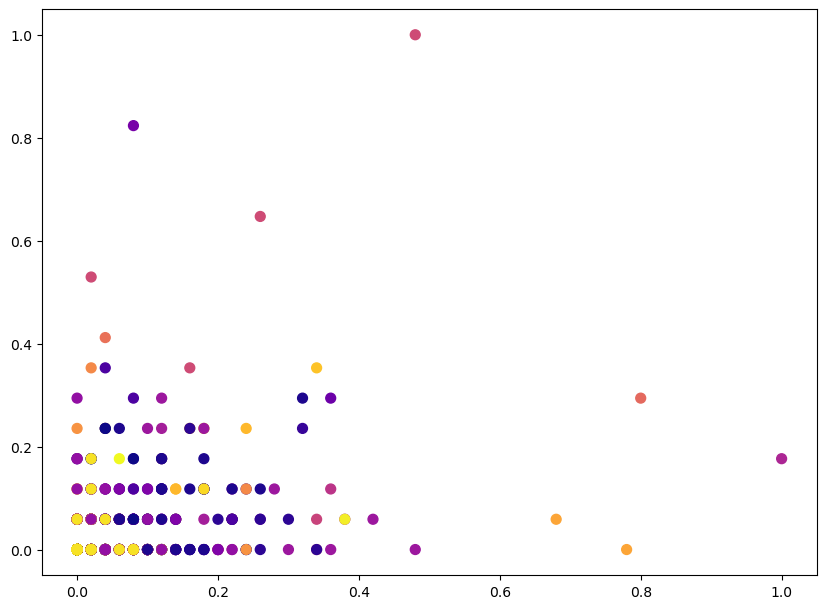

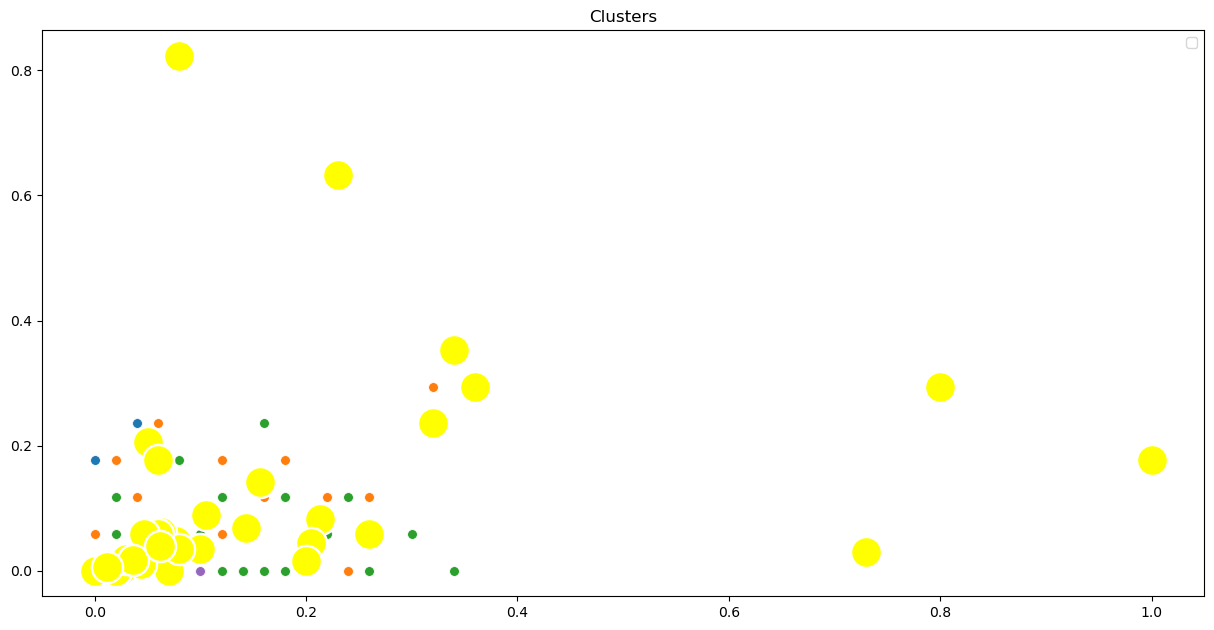

In [8]:
experiment(doc, words, counts, MIN_FREQUENCY, WINDOWS_SIZE, CLUSTERS_NUMBER, True, True, False, False, False)

### Experimento usando solo el atributo **tag_** y **pos_**

Clustering finished

Total clusters: 40
Cluster# 0  - Total words: 18
Cluster# 1  - Total words: 66
Cluster# 2  - Total words: 2
Cluster# 3  - Total words: 4
Cluster# 4  - Total words: 1
Cluster# 5  - Total words: 2
Cluster# 6  - Total words: 1
Cluster# 7  - Total words: 32
Cluster# 8  - Total words: 5
Cluster# 9  - Total words: 29
Cluster# 10  - Total words: 7
Cluster# 11  - Total words: 45
Cluster# 12  - Total words: 1
Cluster# 13  - Total words: 3
Cluster# 14  - Total words: 90
Cluster# 15  - Total words: 2
Cluster# 16  - Total words: 8
Cluster# 17  - Total words: 1
Cluster# 18  - Total words: 14
Cluster# 19  - Total words: 66
Cluster# 20  - Total words: 39
Cluster# 21  - Total words: 6
Cluster# 22  - Total words: 1
Cluster# 23  - Total words: 1
Cluster# 24  - Total words: 2
Cluster# 25  - Total words: 41
Cluster# 26  - Total words: 1
Cluster# 27  - Total words: 1
Cluster# 28  - Total words: 52
Cluster# 29  - Total words: 3
Cluster# 30  - Total words: 10
Cluster# 31  - Total words: 

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.8/site-pack

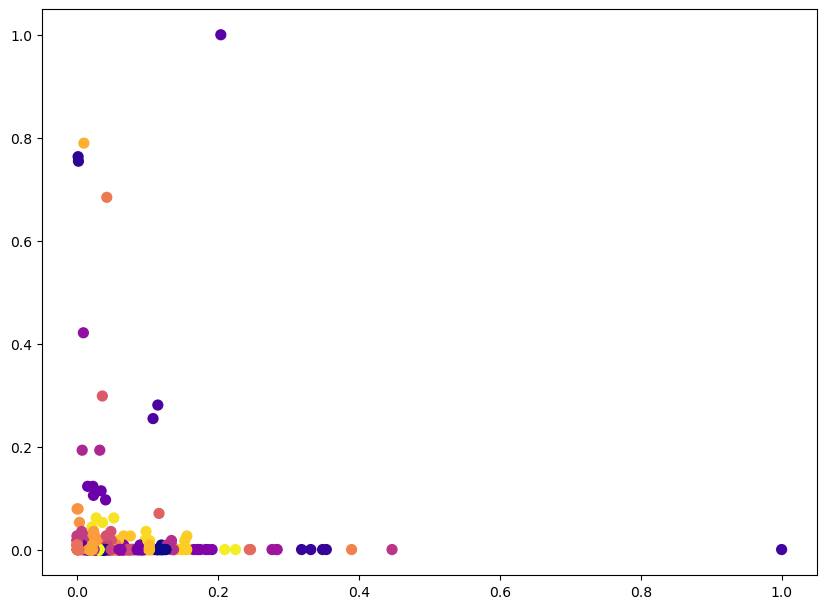

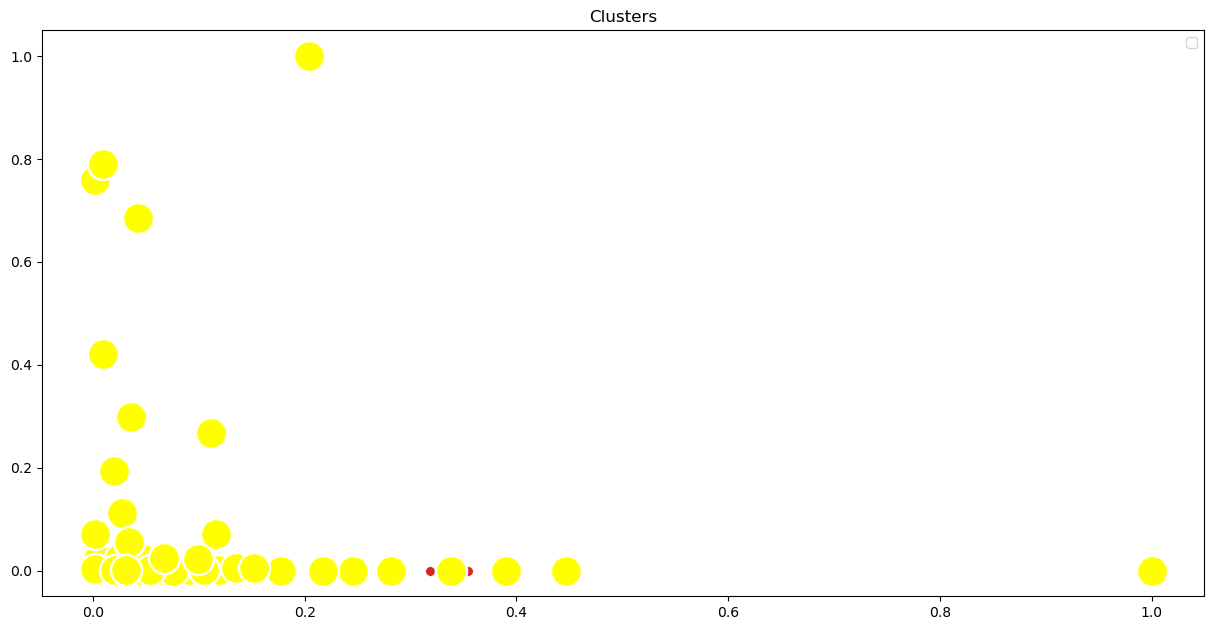

In [9]:
experiment(doc, words, counts, MIN_FREQUENCY, WINDOWS_SIZE, CLUSTERS_NUMBER, True, False, True, False, False)

### Experimento usando solo el atributo **dep_** y **tag_**

Clustering finished

Total clusters: 40
Cluster# 0  - Total words: 76
Cluster# 1  - Total words: 3
Cluster# 2  - Total words: 9
Cluster# 3  - Total words: 25
Cluster# 4  - Total words: 11
Cluster# 5  - Total words: 28
Cluster# 6  - Total words: 1
Cluster# 7  - Total words: 121
Cluster# 8  - Total words: 1
Cluster# 9  - Total words: 1
Cluster# 10  - Total words: 1
Cluster# 11  - Total words: 22
Cluster# 12  - Total words: 1
Cluster# 13  - Total words: 87
Cluster# 14  - Total words: 323
Cluster# 15  - Total words: 5
Cluster# 16  - Total words: 4
Cluster# 17  - Total words: 1
Cluster# 18  - Total words: 1
Cluster# 19  - Total words: 1
Cluster# 20  - Total words: 1
Cluster# 21  - Total words: 4
Cluster# 22  - Total words: 9
Cluster# 23  - Total words: 1
Cluster# 24  - Total words: 6
Cluster# 25  - Total words: 1
Cluster# 26  - Total words: 6
Cluster# 27  - Total words: 4
Cluster# 28  - Total words: 21
Cluster# 29  - Total words: 2
Cluster# 30  - Total words: 37
Cluster# 31  - Total words: 

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.8/site-pack

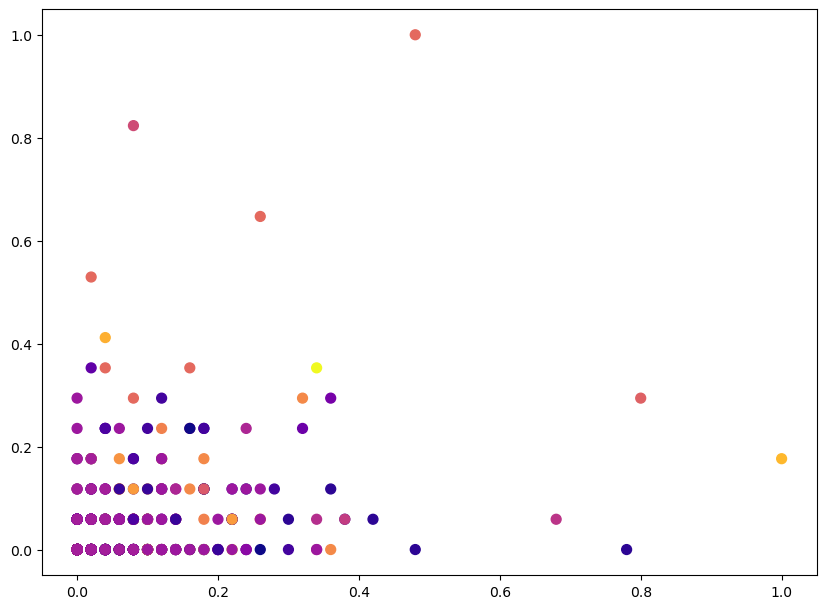

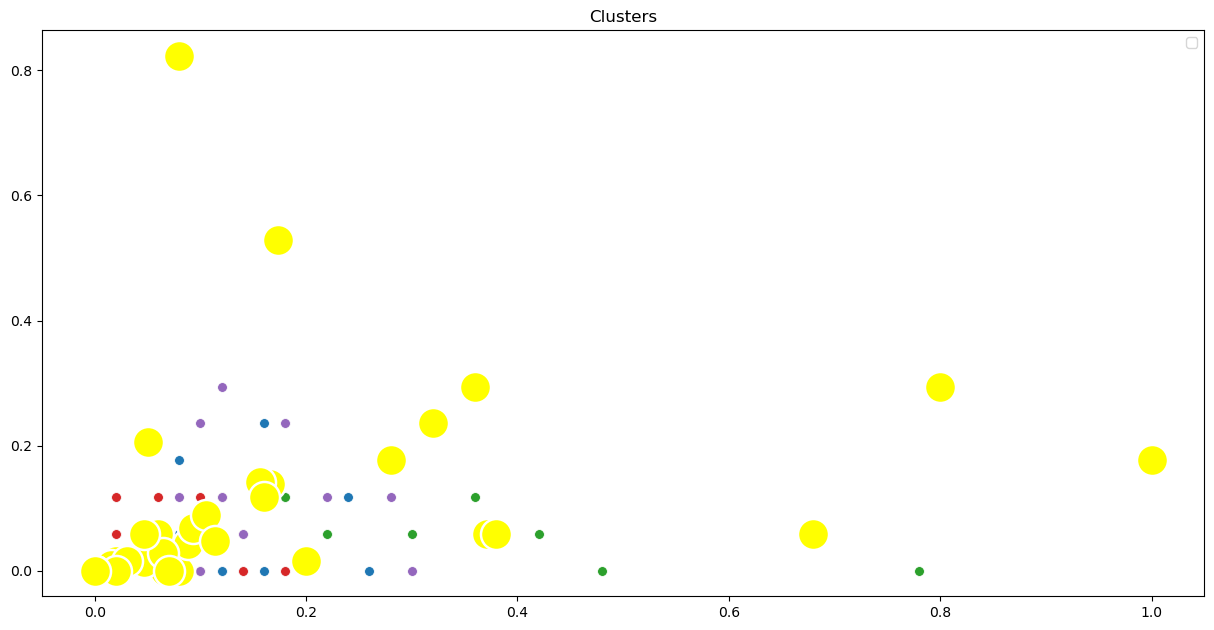

In [10]:
experiment(doc, words, counts, MIN_FREQUENCY, WINDOWS_SIZE, CLUSTERS_NUMBER, False, True, True, False, False)


### Experimento usando solo el atributo **tag_**, **dep_** y **pos_**

Clustering finished

Total clusters: 40
Cluster# 0  - Total words: 293
Cluster# 1  - Total words: 65
Cluster# 2  - Total words: 63
Cluster# 3  - Total words: 3
Cluster# 4  - Total words: 29
Cluster# 5  - Total words: 3
Cluster# 6  - Total words: 1
Cluster# 7  - Total words: 6
Cluster# 8  - Total words: 16
Cluster# 9  - Total words: 2
Cluster# 10  - Total words: 9
Cluster# 11  - Total words: 1
Cluster# 12  - Total words: 1
Cluster# 13  - Total words: 70
Cluster# 14  - Total words: 2
Cluster# 15  - Total words: 41
Cluster# 16  - Total words: 1
Cluster# 17  - Total words: 3
Cluster# 18  - Total words: 1
Cluster# 19  - Total words: 2
Cluster# 20  - Total words: 19
Cluster# 21  - Total words: 1
Cluster# 22  - Total words: 1
Cluster# 23  - Total words: 5
Cluster# 24  - Total words: 129
Cluster# 25  - Total words: 1
Cluster# 26  - Total words: 20
Cluster# 27  - Total words: 16
Cluster# 28  - Total words: 1
Cluster# 29  - Total words: 4
Cluster# 30  - Total words: 1
Cluster# 31  - Total words:

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.8/site-pack

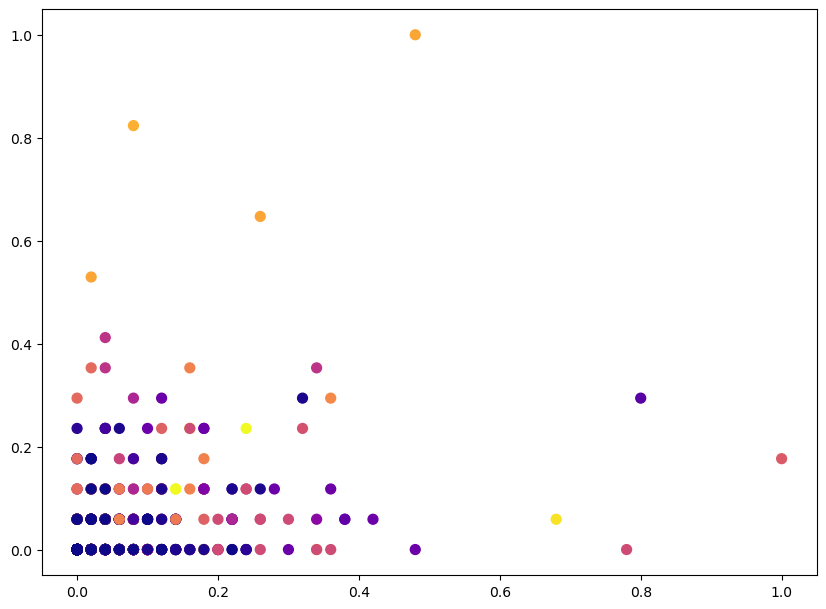

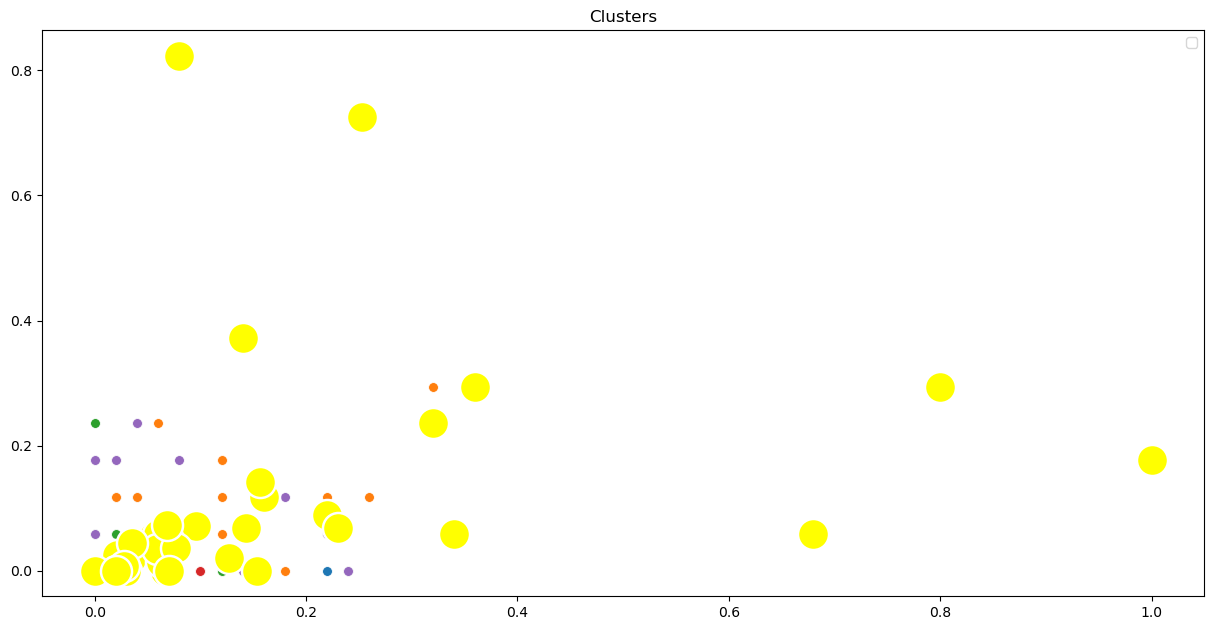

In [11]:
experiment(doc, words, counts, MIN_FREQUENCY, WINDOWS_SIZE, CLUSTERS_NUMBER, True, True, True, False, False)